#### Dependencies
____

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils  import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

#### Load Data
_____

In [3]:
master = pd.read_csv('../resources/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
master.index.freq = 'MS'
master.columns = ['Sales']
master.head(5)


,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


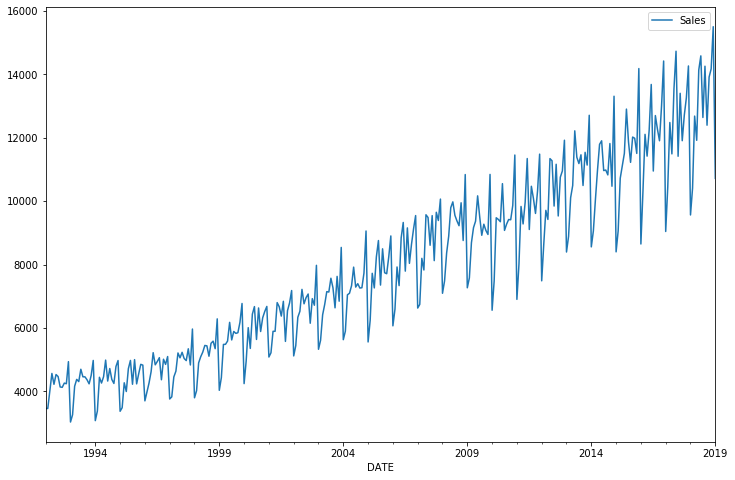

In [5]:
master.plot(figsize=(12,8));

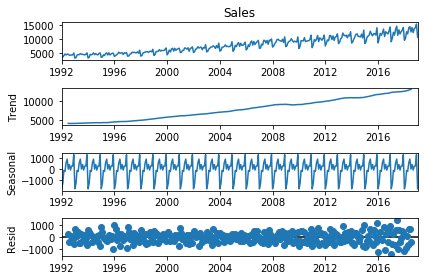

In [8]:
results = seasonal_decompose(master['Sales'])
results.plot();

#### Split Train and Test Data
________

In [10]:
train = master.iloc[:313]
test = master.iloc[313:]

#### Scale & Normalize Training Features
____

In [12]:
scaler = MinMaxScaler()
scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

#### TimeSeries Generator
____

In [29]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)

In [30]:
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


#### Create Model
____

In [31]:
model = Sequential()

model.add(LSTM(units=150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


#### Fit Model
______

In [33]:
model.fit_generator(generator, epochs=25)

Epoch 1/25
301/301 [==============================] - 8s 27ms/step - loss: 0.0188
Epoch 2/25
301/301 [==============================] - 8s 28ms/step - loss: 0.0088
Epoch 3/25
301/301 [==============================] - 8s 27ms/step - loss: 0.0105
Epoch 4/25
301/301 [==============================] - 9s 30ms/step - loss: 0.0082
Epoch 5/25
301/301 [==============================] - 9s 28ms/step - loss: 0.0073
Epoch 6/25
301/301 [==============================] - 8s 28ms/step - loss: 0.0059
Epoch 7/25
301/301 [==============================] - 8s 27ms/step - loss: 0.0044
Epoch 8/25
301/301 [==============================] - 9s 28ms/step - loss: 0.0035
Epoch 9/25
301/301 [==============================] - 9s 28ms/step - loss: 0.0028
Epoch 10/25
301/301 [==============================] - 10s 34ms/step - loss: 0.0025
Epoch 11/25
301/301 [==============================] - 9s 31ms/step - loss: 0.0023
Epoch 12/25
301/301 [==============================] - 9s 29ms/step - loss: 0.0021
Epoch 13/25


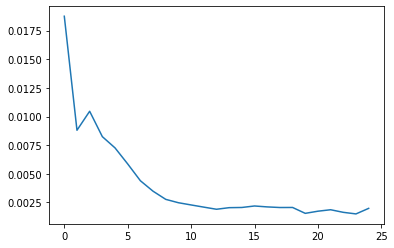

In [34]:
loss = model.history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, loss);

#### Predictions
______

In [22]:
# 12 history steps => step 13
# last 12 points train => pt 1 of test data

In [36]:
first_eval_batch = train[-12:]
first_eval_batch = first_eval_batch.reshape(1, n_input, n_features)

In [38]:
model.predict(first_eval_batch)

array([[0.6831254]], dtype=float32)

#### Forecast
______

In [ ]:
predictions = []
